In [34]:
# Install missing package in this Jupyter kernel
%pip install seaborn
%pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [36]:
# Correct string quoting for the Windows path
df = pd.read_csv(r"E:\Netflix Dataset.csv")

In [37]:
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


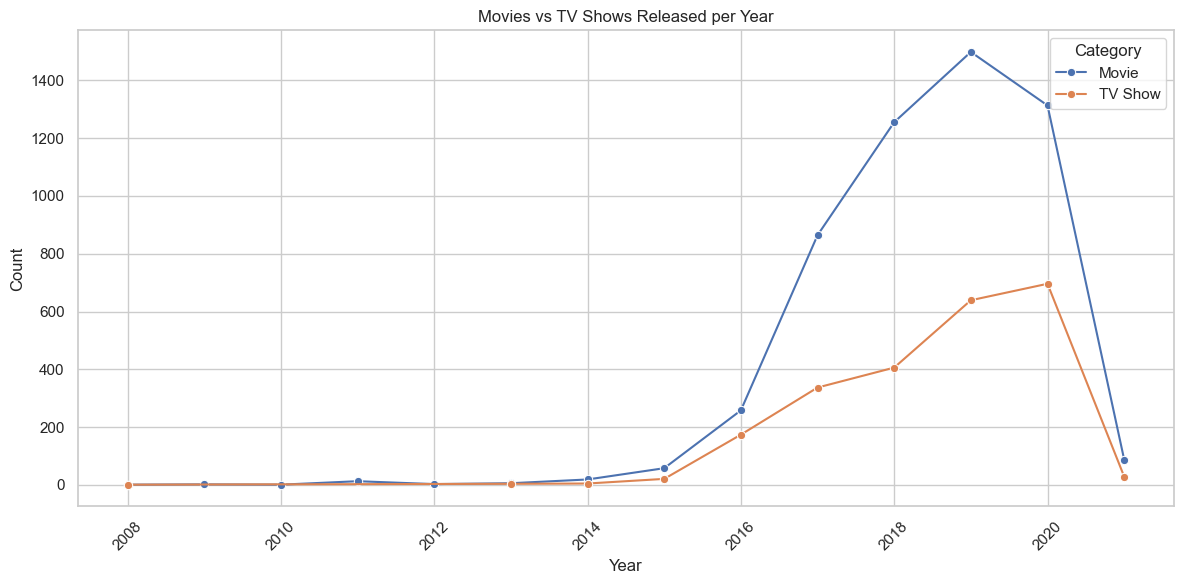

In [46]:
# 1. Line Chart – Movies vs. TV Shows released per year
# Ensure a Year column exists by parsing the Release_Date column
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Build the trend only for rows with a valid year
content_trend = (
	df.dropna(subset=['Year'])
	  .groupby(['Year', 'Category'])
	  .size()
	  .reset_index(name='Count')
)
content_trend['Year'] = content_trend['Year'].astype(int)

sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_13732\287288344.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




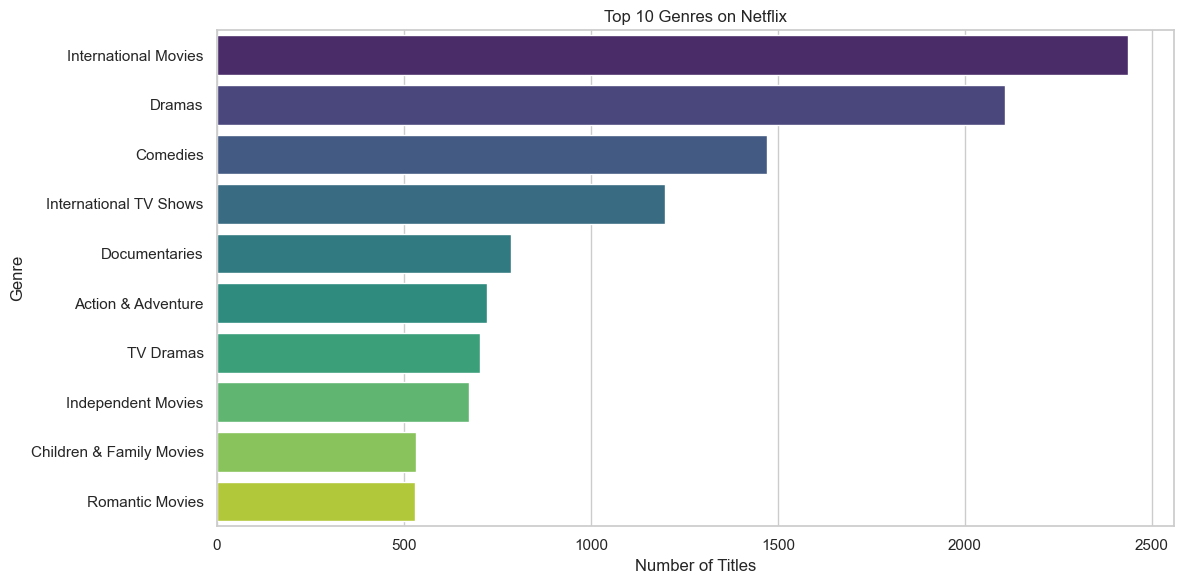

In [39]:
# 2. Bar Chart – Top 10 Genres (split combined genre strings and count each genre)
top_genres = (
    df[genre_col]
      .dropna()
      .astype(str)
      .str.split(',')
      .explode()
      .str.strip()
      .value_counts()
      .head(10)
)

sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

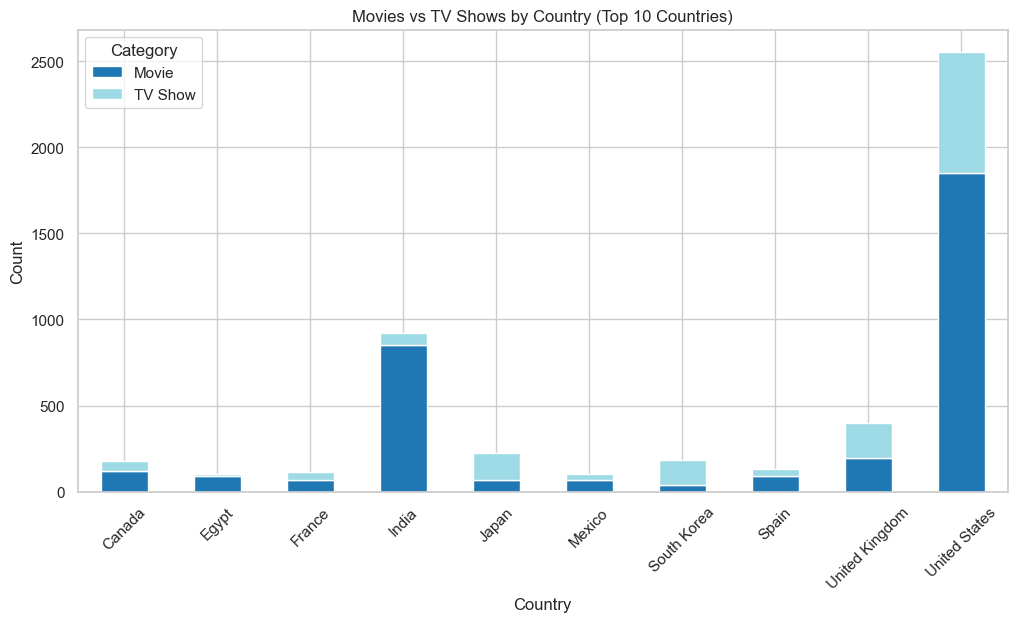

In [40]:
# 3. Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [44]:
# 4. Choropleth Map – Country-wise Content
# Ensure nbformat is available for Jupyter MIME rendering
%pip install nbformat

country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(country_counts, locations="Country", locationmode="country names",
                    color="Count", hover_name="Country",
                    color_continuous_scale="viridis", title="Netflix Content by Country")

# Try to use a notebook renderer (requires nbformat); fall back to browser if needed
import plotly.io as pio
try:
    pio.renderers.default = "notebook_connected"
    fig.show()
except Exception:
    fig.show(renderer="browser")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\HP\AppData\Local\Temp\ipykernel_13732\4081592983.py:7: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



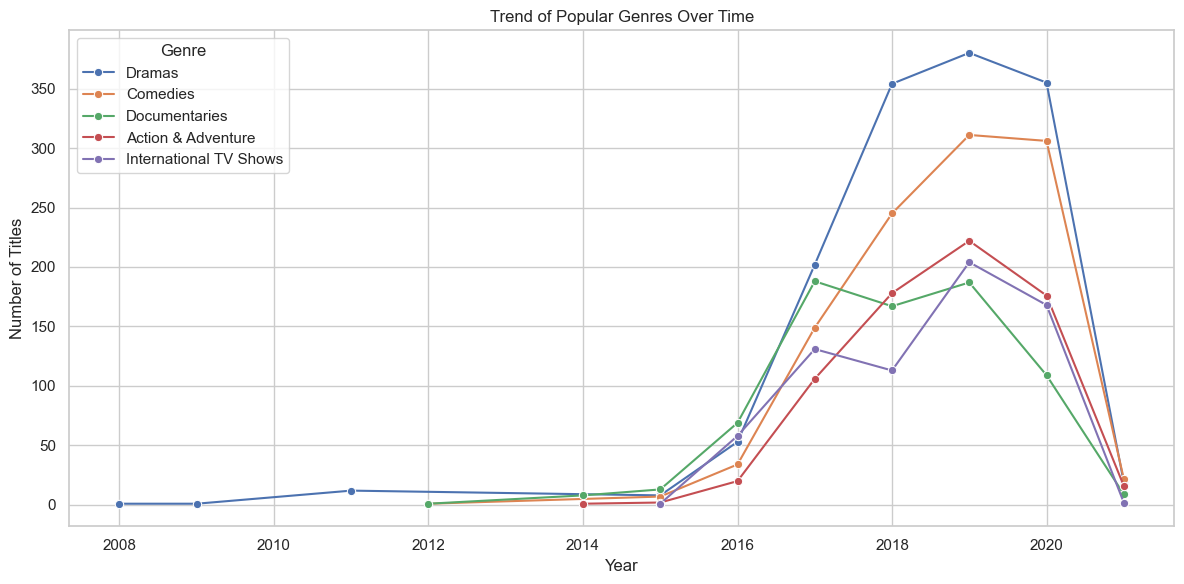

In [45]:
# 5. Trend Line – Growth of Popular Genres Over Time
# Ensure a Main_Genre column exists by taking the first genre from the genre_col (e.g., 'Type')
if 'Main_Genre' not in df.columns:
	df['Main_Genre'] = df[genre_col].fillna('').astype(str).str.split(',').str[0].str.strip()
	df.loc[df['Main_Genre'] == '', 'Main_Genre'] = 'Unknown'

# build trends only for rows with valid Year and one of the top genres
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = (
	df.dropna(subset=['Year'])
	  .loc[df['Main_Genre'].isin(popular_genres)]
	  .groupby(['Year', 'Main_Genre'])
	  .size()
	  .reset_index(name='Count')
)
genre_trends['Year'] = genre_trends['Year'].astype(int)

sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o")
plt.title("Trend of Popular Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()